Challenge Set 1
Topic:        Explore MTA turnstile data
Date:         09/19/2016
Name:         Sarick Shah
Worked with:  

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import datetime
from dateutil import parser
from IPython.display import Image
os.chdir("C:\\Users\\Sarick\\Documents\\Python Scripts")
# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

### Exercise 1.1
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. 

In [4]:
with open('turnstile_160910.csv') as f:
    f.readline()#ignore first line
    reader=csv.reader(f,delimiter=',')        
    mydict=dict([((rows[0], rows[1], rows[2], rows[3]), [rows[4:]]) for rows in reader])

### Exercise 1.2
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

In [5]:
df = pd.read_csv('turnstile_160910.csv')
df.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
new_df=df.drop(['LINENAME', 'DIVISION', 'DESC', 'EXITS'], axis = 1)
new_df['DATETIME'] = new_df.DATE.astype(str).str.cat(new_df.TIME.astype(str), sep=' ')
#from dateutil, makes datetime object
dt_converter = lambda x: parser.parse(x)
new_df['DATETIME'] = new_df['DATETIME'].map(dt_converter)
new_df.drop(['DATE', 'TIME'], axis = 1, inplace = True)

### Exercise 1.3
These counts are for every n hours. (What is n?) We want total daily entries.

In [6]:
df_sum = df.drop(['LINENAME', 'DIVISION', 'DESC', 'EXITS', 'TIME'], axis = 1)
df_sum['DATE'] = df_sum['DATE'].map(dt_converter)
df_sum['ENTERED'] = (df['ENTRIES'].sub(df['ENTRIES'].shift())).abs()
df_sum.fillna(0, inplace=True)

df_sum.loc[df_sum['ENTERED']>3000, 'ENTERED'] = 0
df_sum_daily = df_sum.groupby(['C/A', 'UNIT', 'SCP', 'STATION','DATE'])['ENTERED'].sum()
df_sum_daily = df_sum_daily.reset_index()

### Exercise 1.4
We will plot the daily time series for a turnstile.



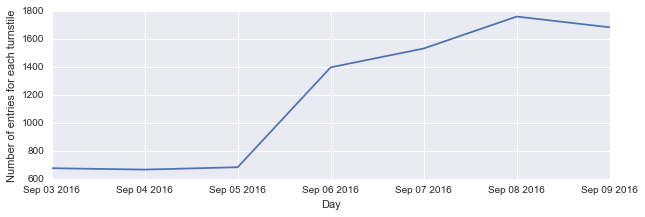

In [16]:
dates = df_sum_daily['DATE'].tolist()
counts = df_sum_daily['ENTERED'].tolist()
plt.figure(figsize=(10,3))
plt.xlabel('Day')
plt.ylabel('Number of entries for each turnstile')
plt.plot(dates[:7],counts[:7])

### Exercise 1.5
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

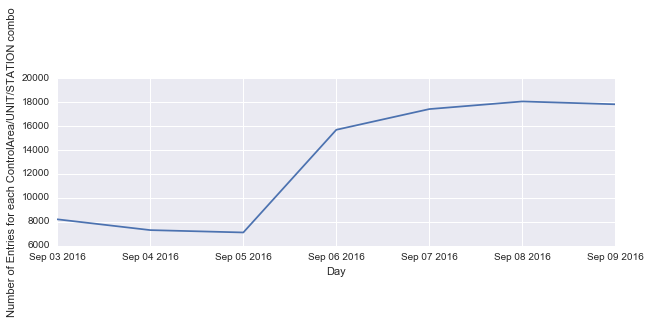

In [15]:
df_sum_combo = df_sum.groupby(['C/A', 'UNIT', 'STATION','DATE'])['ENTERED'].sum()
df_sum_combo = df_sum_combo.reset_index()

dates = df_sum_combo['DATE'].tolist()
counts = df_sum_combo['ENTERED'].tolist()
plt.figure(figsize=(10,3))
plt.xlabel('Day')
plt.ylabel('Number of Entries for each ControlArea/UNIT/STATION combo')
plt.plot(dates[:7],counts[:7])

### Exercise 1.6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [9]:
df_sum_station = df_sum.groupby(['STATION','DATE'])['ENTERED'].sum()
df_sum_station = df_sum_station.reset_index()

### Exercise 1.7
Plot the time series for a station

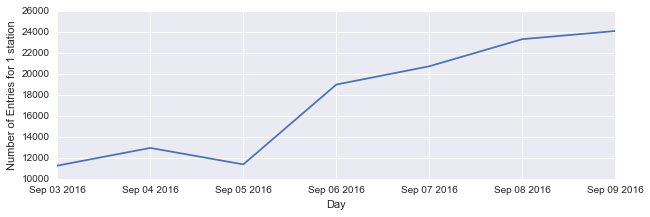

In [14]:
dates = df_sum_station['DATE'].tolist()
counts = df_sum_station['ENTERED'].tolist()
plt.figure(figsize=(10,3))
plt.xlabel('Day')
plt.ylabel('Number of Entries for 1 station')
plt.plot(dates[:7],counts[:7])

### Exercise 1.8
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [11]:
df2 = pd.read_csv('turnstile_160924.csv')
df3 = pd.read_csv('turnstile_160917.csv')
df4 = pd.read_csv('turnstile_160903.csv')

In [12]:
def make_df_station(d):
    d.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
    df_sum2 = d.drop(['LINENAME', 'DIVISION', 'DESC', 'EXITS', 'TIME'], axis = 1)
    df_sum2['DATE'] = df_sum2['DATE'].map(dt_converter)
    df_sum2['ENTERED'] = (d['ENTRIES'].sub(d['ENTRIES'].shift())).abs()
    df_sum2.fillna(0, inplace=True)
    df_sum2.loc[df_sum2['ENTERED']>3000, 'ENTERED'] = 0
    df_sum_station2 = df_sum2.groupby(['STATION','DATE'])['ENTERED'].sum()
    df_sum_station2 = df_sum_station2.reset_index()
    
    dates = df_sum_station2['DATE'].tolist()
    counts = df_sum_station2['ENTERED'].tolist()    
    return [dates, counts]

In [13]:
a = make_df_station(df2)
b = make_df_station(df3)
c = make_df_station(df4)
d = make_df_station(df)

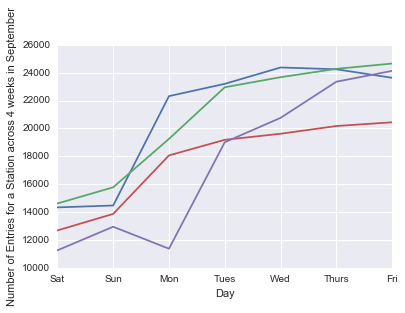

In [18]:
plt.xticks(range(7),['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
plt.xlabel('Day')
plt.ylabel('Number of Entries for a Station across 4 weeks in September')
plt.plot(a[1][:7], label = 'Week 4')
plt.plot(b[1][:7], label = 'Week 3')
plt.plot(c[1][:7], label = 'Week 1')
plt.plot(d[1][:7], label = 'Week 2')


### Exercise 1.9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate


In [19]:
def make_df_station2(d1, d2, d3, d4):
    d = pd.concat([d1, d2, d3, d4])    
    d.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
    df_sum2 = d.drop(['LINENAME', 'DIVISION', 'DESC', 'EXITS', 'TIME'], axis = 1)
    df_sum2['DATE'] = df_sum2['DATE'].map(dt_converter)
    df_sum2['ENTERED'] = (d['ENTRIES'].sub(d['ENTRIES'].shift())).abs()
    df_sum2.fillna(0, inplace=True)
    df_sum2.loc[df_sum2['ENTERED']>3000, 'ENTERED'] = 0
    df_sum_station2 = df_sum2.groupby(['STATION'])['ENTERED'].sum()
    df_sum_station2 = df_sum_station2.reset_index()    
    df_sum_station2.sort('ENTERED', inplace=True)
    stations = df_sum_station2['STATION'].tolist()
    counts = df_sum_station2['ENTERED'].tolist()    
    return [stations, counts]


In [20]:
e = make_df_station2(df, df2, df3, df4)


C:\Users\Sarick\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Exercise 1.10
Plot a histogram of the total ridership values

(array([ 272.,   65.,   18.,    5.,    4.,    3.,    3.,    2.,    1.,    1.]),
 array([  1.40000000e+01,   3.93043800e+05,   7.86073600e+05,
          1.17910340e+06,   1.57213320e+06,   1.96516300e+06,
          2.35819280e+06,   2.75122260e+06,   3.14425240e+06,
          3.53728220e+06,   3.93031200e+06]),
 <a list of 10 Patch objects>)

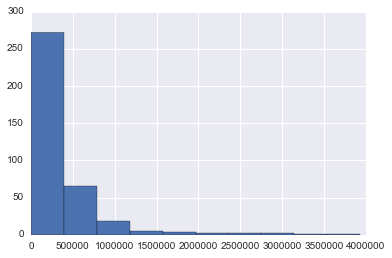

In [28]:
plt.hist(e[1])